In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from scipy.stats import zscore 
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler,LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
w=pd.read_csv('winequality-red.csv',sep=';')
w

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
w.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
w.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
w.shape

(1599, 12)

In [7]:
w.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [8]:
w.tail(9)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1590,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [9]:
w.mean()

fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  5.636023
dtype: float64

In [10]:
w.median()

fixed acidity            7.90000
volatile acidity         0.52000
citric acid              0.26000
residual sugar           2.20000
chlorides                0.07900
free sulfur dioxide     14.00000
total sulfur dioxide    38.00000
density                  0.99675
pH                       3.31000
sulphates                0.62000
alcohol                 10.20000
quality                  6.00000
dtype: float64

In [11]:
w.std()

fixed acidity            1.741096
volatile acidity         0.179060
citric acid              0.194801
residual sugar           1.409928
chlorides                0.047065
free sulfur dioxide     10.460157
total sulfur dioxide    32.895324
density                  0.001887
pH                       0.154386
sulphates                0.169507
alcohol                  1.065668
quality                  0.807569
dtype: float64

In [12]:
w.min()

fixed acidity           4.60000
volatile acidity        0.12000
citric acid             0.00000
residual sugar          0.90000
chlorides               0.01200
free sulfur dioxide     1.00000
total sulfur dioxide    6.00000
density                 0.99007
pH                      2.74000
sulphates               0.33000
alcohol                 8.40000
quality                 3.00000
dtype: float64

In [13]:
w.max()

fixed acidity            15.90000
volatile acidity          1.58000
citric acid               1.00000
residual sugar           15.50000
chlorides                 0.61100
free sulfur dioxide      72.00000
total sulfur dioxide    289.00000
density                   1.00369
pH                        4.01000
sulphates                 2.00000
alcohol                  14.90000
quality                   8.00000
dtype: float64

In [14]:
w.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [15]:
w.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

no trace of any null values

In [16]:
w.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [17]:
w.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [18]:
#dividing the quality of wine in two quality i.e. good for 6,7 and 8 and bad for 3,4,5, by binning method and saving them in a new col.
w['Quality']=pd.cut(w['quality'],bins=(2,5,8),labels=['BAD','GOOD'])

In [19]:
w.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,BAD
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,BAD
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,BAD
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,GOOD
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,BAD
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,BAD
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,BAD
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,GOOD
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,GOOD
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,BAD


In [20]:
#checking the count of GOOD & BAD quality of wine after mapping
w.Quality.value_counts()

GOOD    855
BAD     744
Name: Quality, dtype: int64

In [21]:
#dropping quality column 
w.drop(['quality'],axis=1,inplace=True)

In [22]:
w.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'Quality'],
      dtype='object')

In [23]:
w.groupby(['Quality']).mean()
#groupping the dataset wrt quality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
Quality,,,,,,,,,,,
BAD,8.142204,0.589503,0.237755,2.542070,0.092989,16.567204,54.645161,0.997068,3.311653,0.618535,9.926478
GOOD,8.474035,0.474146,0.299883,2.535965,0.082661,15.272515,39.352047,0.996467,3.310643,0.692620,10.855029


In [24]:
w[['citric acid','Quality']].groupby(['Quality']).mean()
#a higher presence of citric acid relates to a good quality

,citric acid
Quality,
BAD,0.237755
GOOD,0.299883


In [25]:
#creating a cross_tabular view to check the relations of all attribute wrt to quality
for i in w.columns:
    ctab=pd.crosstab(w[i],w['Quality'])
    print('---------------------------------------------------\n',ctab)

---------------------------------------------------
 Quality        BAD  GOOD
fixed acidity           
4.6              1     0
4.7              0     1
4.9              0     1
5.0              2     4
5.1              0     4
...            ...   ...
14.3             0     1
15.0             0     2
15.5             2     0
15.6             1     1
15.9             1     0

[96 rows x 2 columns]
---------------------------------------------------
 Quality           BAD  GOOD
volatile acidity           
0.120               0     3
0.160               0     2
0.180               2     8
0.190               1     1
0.200               1     2
...               ...   ...
1.180               1     0
1.185               1     0
1.240               1     0
1.330               2     0
1.580               1     0

[143 rows x 2 columns]
---------------------------------------------------
 Quality      BAD  GOOD
citric acid           
0.00          70    62
0.01          12    21
0.02         

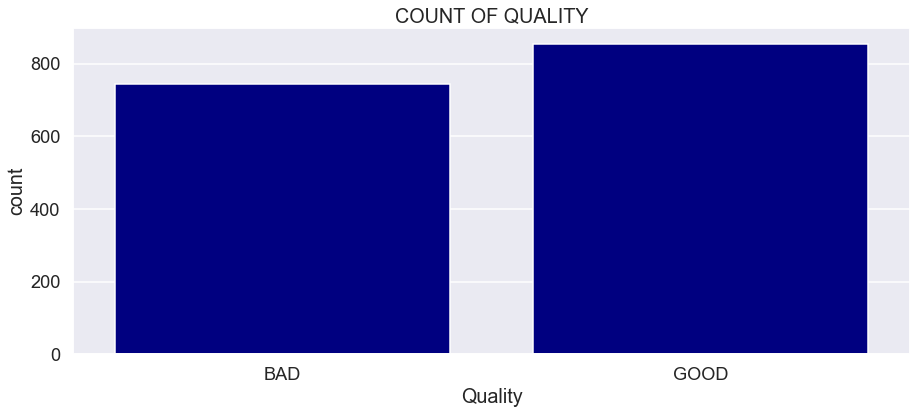

In [26]:
plt.figure(figsize=(15,6))
sns.set(style='darkgrid')
sns.set_context('talk',font_scale=1.1)
sns.countplot(x='Quality',color='navy',data=w,saturation=21)
plt.title("COUNT OF QUALITY")
plt.show()

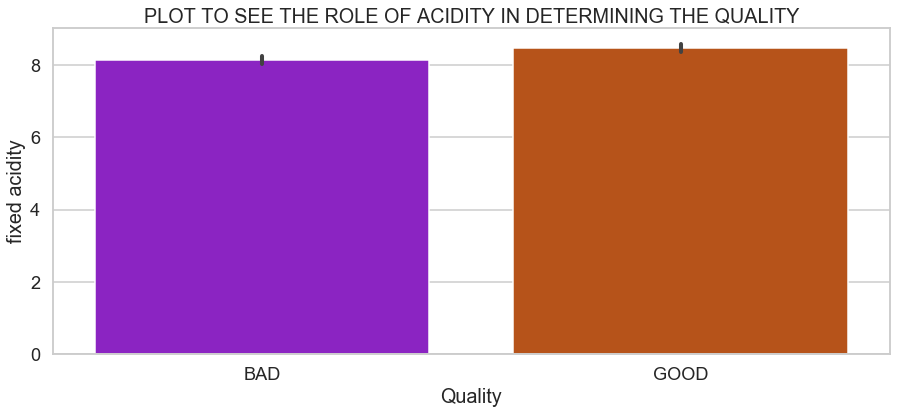

In [27]:
plt.figure(figsize=(15,6))
sns.set(style='whitegrid')
sns.set_context('talk',font_scale=1.1)
sns.barplot(x='Quality',y='fixed acidity',color='darkturquoise',data=w,palette='gnuplot')
plt.title("PLOT TO SEE THE ROLE OF ACIDITY IN DETERMINING THE QUALITY")
plt.show()

    The above plot is showing that the good quality wine has slightly a higher quantity of fixed acidity

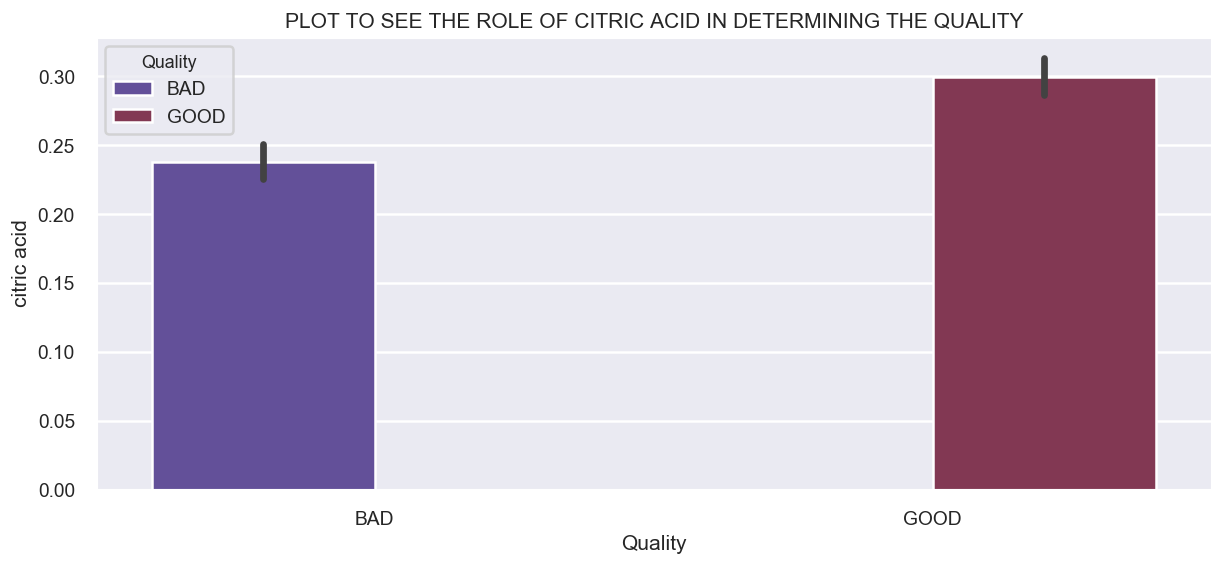

In [28]:
sns.set(style='darkgrid')
sns.set_context('talk',font_scale=0.7)
plt.figure(figsize=(12,5),dpi=120)
sns.barplot(x='Quality',y='citric acid',hue='Quality',data=w,palette='twilight')
plt.title("PLOT TO SEE THE ROLE OF CITRIC ACID IN DETERMINING THE QUALITY")
plt.show()

    The above plot is showing a higher quantity of citric acid in good quality of wine 

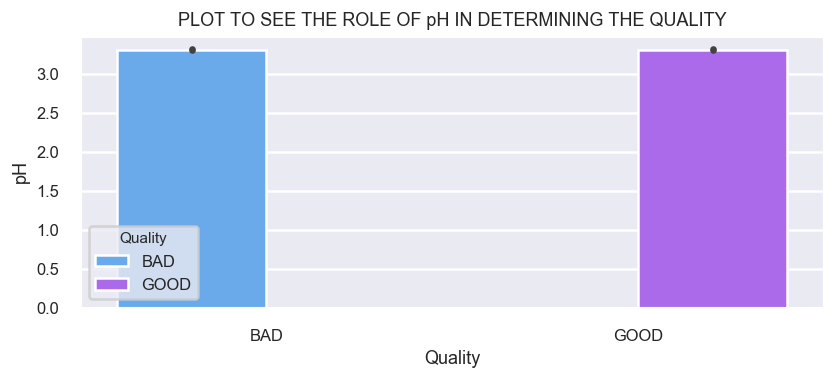

In [29]:
sns.set(style='darkgrid')
sns.set_context('talk',font_scale=0.6)
plt.figure(figsize=(8,3),dpi=120)
sns.barplot(x='Quality',y='pH',hue='Quality',data=w,palette='cool')
plt.title("PLOT TO SEE THE ROLE OF pH IN DETERMINING THE QUALITY")
plt.show()

    The above plot is showing that pH value of both the wine quality are same

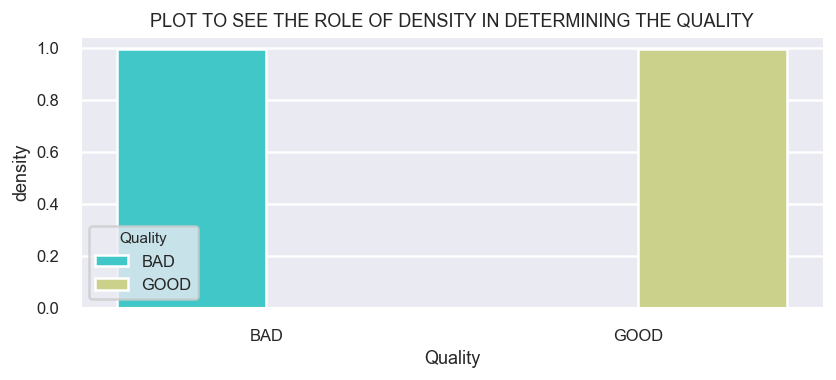

In [30]:
sns.set(style='darkgrid')
sns.set_context('talk',font_scale=0.6)
plt.figure(figsize=(8,3),dpi=120)
sns.barplot(x='Quality',y='density',hue='Quality',data=w,palette='rainbow')
plt.title("PLOT TO SEE THE ROLE OF DENSITY IN DETERMINING THE QUALITY")
plt.show()

    The above plotting is showing equal density for both kind of quality of wine

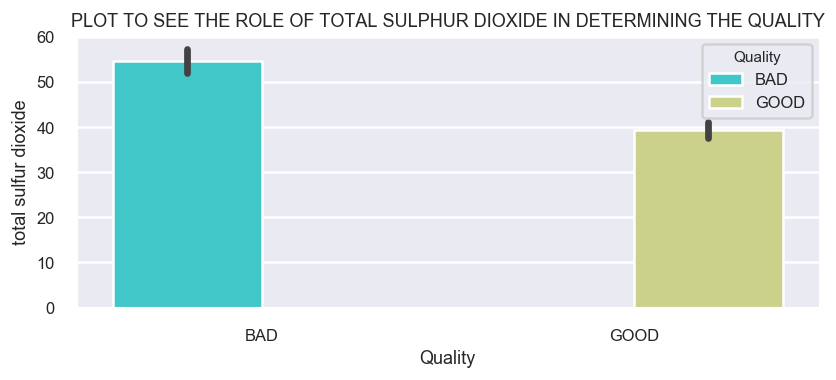

In [31]:
sns.set(style='darkgrid')
sns.set_context('talk',font_scale=0.6)
plt.figure(figsize=(8,3),dpi=120)
sns.barplot(x='Quality',y='total sulfur dioxide',hue='Quality',data=w,palette='rainbow')
plt.title("PLOT TO SEE THE ROLE OF TOTAL SULPHUR DIOXIDE IN DETERMINING THE QUALITY")
plt.show()

 The above plot is showing a higher amount of Sulphur Dioxide in BAD quality of wine

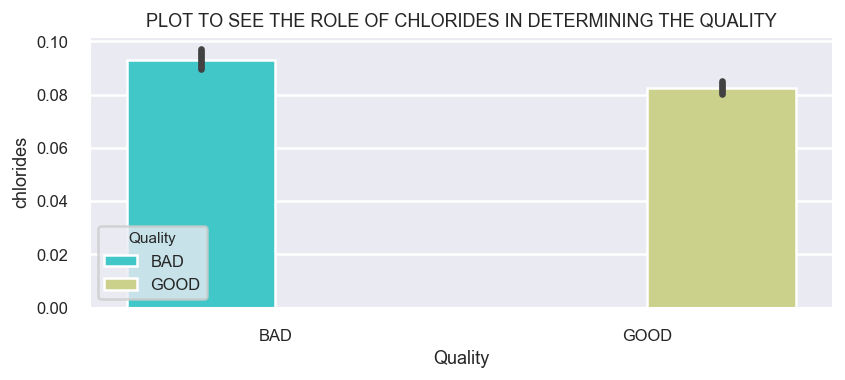

In [32]:
sns.set(style='darkgrid')
sns.set_context('talk',font_scale=0.6)
plt.figure(figsize=(8,3),dpi=120)
sns.barplot(x='Quality',y='chlorides',hue='Quality',data=w,palette='rainbow')
plt.title("PLOT TO SEE THE ROLE OF CHLORIDES IN DETERMINING THE QUALITY")
plt.show()

    The above plot is showing a higher amount of Chlorides in BAD quality of wine

<Figure size 1080x360 with 0 Axes>

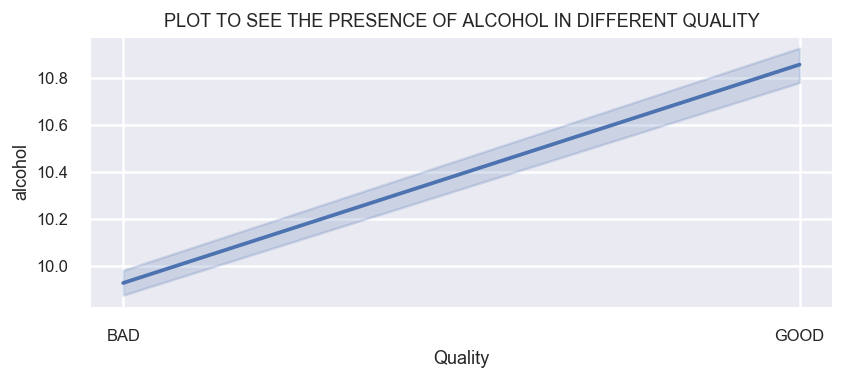

In [33]:
sns.set(style='darkgrid')
plt.figure(figsize=(15,5))
sns.set_context('talk',font_scale=0.6)
plt.figure(figsize=(8,3),dpi=120)
sns.lineplot(x='Quality',y='alcohol',data=w,dashes=True,err_style="band")
plt.title("PLOT TO SEE THE PRESENCE OF ALCOHOL IN DIFFERENT QUALITY")
plt.show()

The above plot is showing a higher amount of alcohol in a Good Quality wine

<Figure size 1080x360 with 0 Axes>

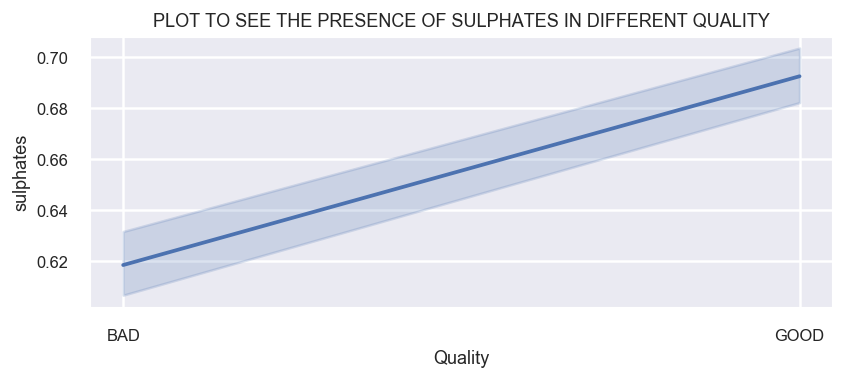

In [34]:
sns.set(style='darkgrid')
plt.figure(figsize=(15,5))
sns.set_context('talk',font_scale=0.6)
plt.figure(figsize=(8,3),dpi=120)
sns.lineplot(x='Quality',y='sulphates',data=w,dashes=True,err_style="band")
plt.title("PLOT TO SEE THE PRESENCE OF SULPHATES IN DIFFERENT QUALITY")
plt.show()

The plot is showing a higher quamtity of Sulphates in Good Quality Wine

<Figure size 1080x360 with 0 Axes>

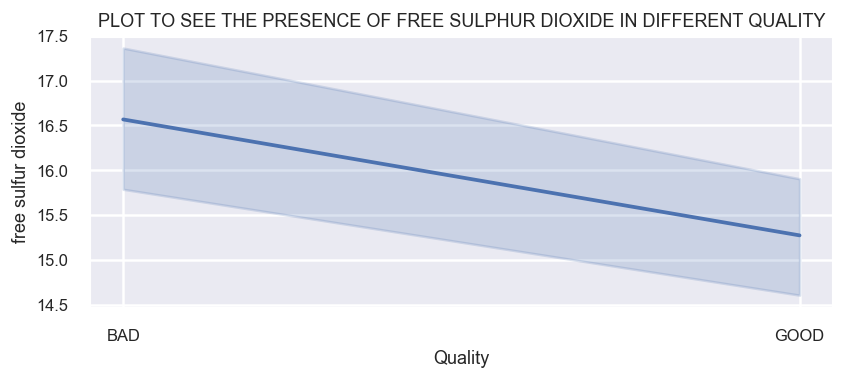

In [35]:
sns.set(style='darkgrid')
plt.figure(figsize=(15,5))
sns.set_context('talk',font_scale=0.6)
plt.figure(figsize=(8,3),dpi=120)
sns.lineplot(x='Quality',y='free sulfur dioxide',data=w,dashes=True,err_style="band",palette='rainbow',legend='brief')
plt.title("PLOT TO SEE THE PRESENCE OF FREE SULPHUR DIOXIDE IN DIFFERENT QUALITY")
plt.show()

 The above plotting is showing that the quantity of Free Sulphur Dioxide is higher in case of a BAD quality wine

<Figure size 1080x360 with 0 Axes>

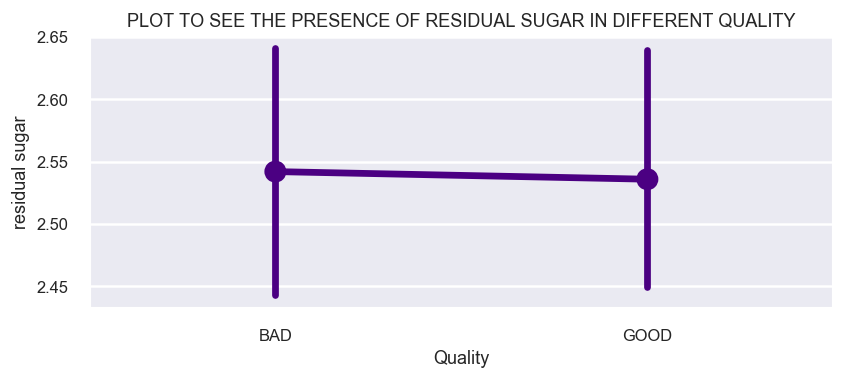

In [36]:
sns.set(style='darkgrid')
plt.figure(figsize=(15,5))
sns.set_context('talk',font_scale=0.6)
plt.figure(figsize=(8,3),dpi=120)
sns.pointplot(x='Quality',y='residual sugar',data=w,color='indigo',dashes=True,err_style="band")
plt.title("PLOT TO SEE THE PRESENCE OF RESIDUAL SUGAR IN DIFFERENT QUALITY")
plt.show()

The above plotting is showing that a bad quality wine has slightly higher amount of residual sugar

In [37]:
#LabelEncoding the attribute Quality with the help of LabelEncoder

In [38]:
lbl=LabelEncoder()
w['Quality']=lbl.fit_transform(w['Quality'])

In [39]:
w

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [40]:
#outlier finding and removal with the help of Boxplot and Zscore

In [41]:
cl=w.columns.values
cl

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'Quality'], dtype=object)

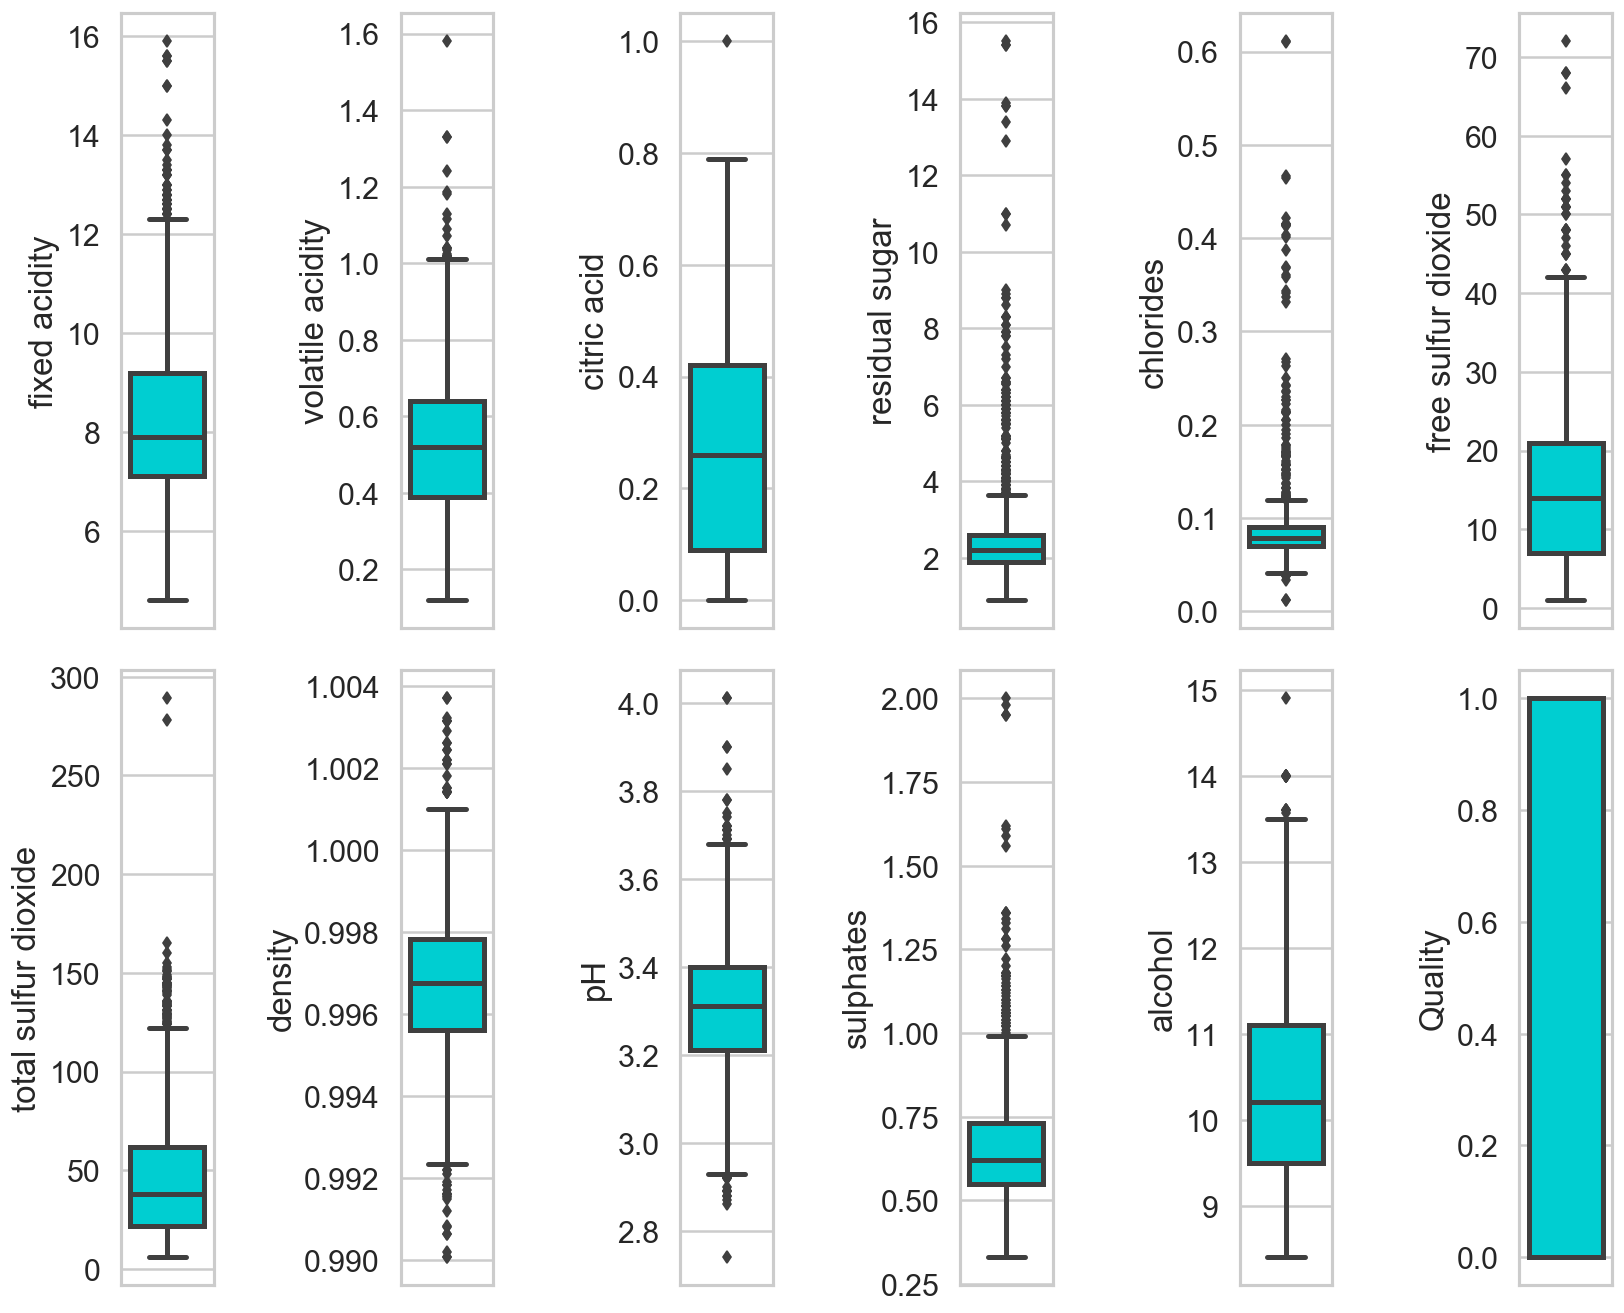

In [42]:
sns.set(style='whitegrid')
sns.set_context('talk',font_scale=1.1)
plt.figure(figsize=(14,55),dpi=120)
for i in range (0, len(cl)):
    plt.subplot(10,6,i+1)
    sns.boxplot(w[cl[i]], color='darkturquoise',saturation=22,linewidth=3,orient='v')
plt.tight_layout()

In [43]:
z=np.abs(zscore(w))
z

array([[0.52835961, 0.96187667, 1.39147228, ..., 0.57920652, 0.96024611,
        1.07200445],
       [0.29854743, 1.96744245, 1.39147228, ..., 0.1289504 , 0.58477711,
        1.07200445],
       [0.29854743, 1.29706527, 1.18607043, ..., 0.04808883, 0.58477711,
        1.07200445],
       ...,
       [1.1603431 , 0.09955388, 0.72391627, ..., 0.54204194, 0.54162988,
        0.93283195],
       [1.39015528, 0.65462046, 0.77526673, ..., 0.30598963, 0.20930812,
        1.07200445],
       [1.33270223, 1.21684919, 1.02199944, ..., 0.01092425, 0.54162988,
        0.93283195]])

In [44]:
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        467,  480,  480,  494,  515,  544,  554,  554,  555,  555,  557,
        557,  568,  584,  588,  591,  595,  608,  614,  636,  639,  649,
        649,  651,  652,  652,  652,  672,  672,  684,  690,  692,  692,
        695,  723,  724,  730,  754,  776,  777,  795,  821,  836,  837,
        889,  911,  917,  923,  925,  926,  982, 1017, 1018, 1043, 1051,
       1051, 1071, 1074, 1079, 1079, 1081, 1081, 1111, 1114, 1131, 1154,
       1165, 1175, 1186, 1231, 1235, 1244, 1244, 1244, 1260, 1269, 1269,
       1270, 1270, 1288, 1289, 1295, 1296, 1299, 1

In [45]:
print('few outlier values\n',z[13][9],'\n',z[14][5],'\n',z[1589][3])

few outlier values
 5.32210116796055 
 3.454668962073944 
 3.732701384742145


In [46]:
redwine=w[(z<3).all(axis=1)]

In [47]:
redwine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [48]:
print("The shape of wine dataset with outliers was:",w.shape,'\nThe shape of wine dataset after outlier removal becomes: ', redwine.shape)

The shape of wine dataset with outliers was: (1599, 12) 
The shape of wine dataset after outlier removal becomes:  (1458, 12)


so a total of 119 rows containing outliers has been removed

In [49]:
#checking for distribution and skewness

In [50]:
cl=redwine.columns.values
cl

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'Quality'], dtype=object)

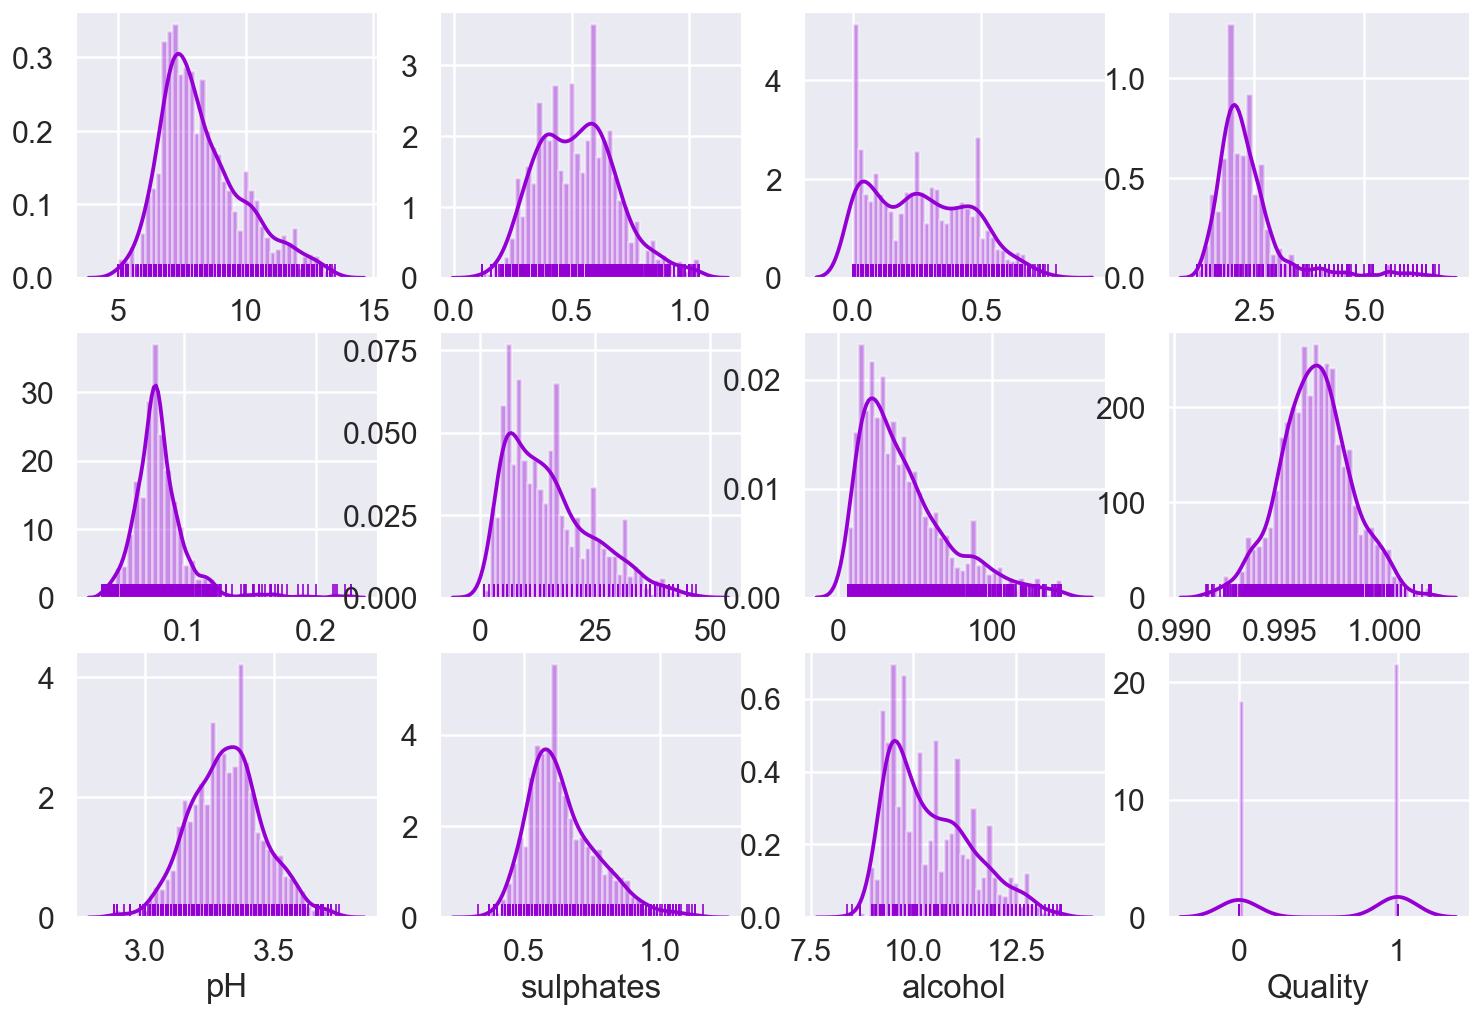

In [51]:
sns.set(style='darkgrid')
sns.set_context('talk',font_scale=1.1)
plt.figure(figsize=(15,10),dpi=120)
for i in range(0,12):
    plt.subplot(3,4,i+1)
    sns.distplot(redwine[cl[i]],bins=40,rug=True,kde=True,color='darkviolet')

In [52]:
redwine.skew()

fixed acidity           0.820879
volatile acidity        0.392097
citric acid             0.292600
residual sugar          2.450707
chlorides               2.307274
free sulfur dioxide     0.869727
total sulfur dioxide    1.185230
density                 0.055543
pH                      0.113039
sulphates               0.893297
alcohol                 0.757396
Quality                -0.159793
dtype: float64

In [53]:
#skew of 0.55 is allowable so any attribute having skew value more than 0.55 will be treated as skewed data and must be removed.
for i in redwine.columns:
    if redwine.skew().loc[i]>0.55:
        redwine[i]=np.log1p(redwine[i])
        

In [54]:
#bivariate analysis

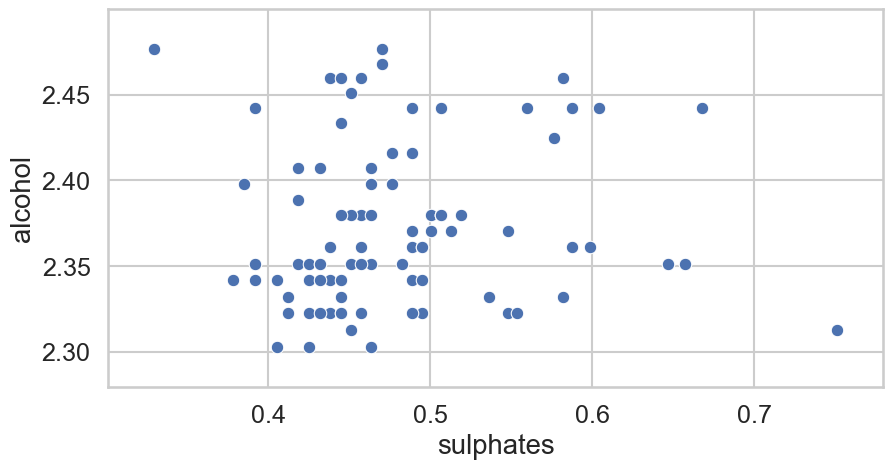

In [55]:
sns.set(style='whitegrid')
sns.set_context('talk',font_scale=1.1)
plt.figure(figsize=(10,5),dpi=100)
sns.scatterplot(x=redwine['sulphates'].head(100),y=redwine['alcohol'].head(100),palette='rainbow')
plt.show()

In [56]:
#checking out the corelational values of all attributes
rw_corr=redwine.corr()

In [57]:
rw_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Quality
fixed acidity,1.000000,-0.296225,0.693847,0.199143,0.203561,-0.170555,-0.097783,0.663849,-0.719780,0.193500,-0.036544,0.107622
volatile acidity,-0.296225,1.000000,-0.589286,0.035964,0.071704,0.041860,0.099330,-0.000446,0.252900,-0.353779,-0.212965,-0.297348
citric acid,0.693847,-0.589286,1.000000,0.187398,0.105527,-0.106019,-0.026176,0.372338,-0.521270,0.306282,0.163627,0.169947
residual sugar,0.199143,0.035964,0.187398,1.000000,0.147653,0.004831,0.089838,0.375612,-0.077379,0.067588,0.163195,0.017506
chlorides,0.203561,0.071704,0.105527,0.147653,1.000000,-0.063163,0.036427,0.336786,-0.185480,0.023700,-0.215065,-0.092508
free sulfur dioxide,-0.170555,0.041860,-0.106019,0.004831,-0.063163,1.000000,0.778775,-0.041365,0.132214,0.043342,-0.090873,-0.058916
total sulfur dioxide,-0.097783,0.099330,-0.026176,0.089838,0.036427,0.778775,1.000000,0.139553,0.031733,0.001186,-0.267604,-0.208534
density,0.663849,-0.000446,0.372338,0.375612,0.336786,-0.041365,0.139553,1.000000,-0.311217,0.129743,-0.465501,-0.149353
pH,-0.719780,0.252900,-0.521270,-0.077379,-0.185480,0.132214,0.031733,-0.311217,1.000000,-0.033962,0.137664,-0.032907
sulphates,0.193500,-0.353779,0.306282,0.067588,0.023700,0.043342,0.001186,0.129743,-0.033962,1.000000,0.249322,0.343565


Text(0.5, 1, 'HEATMAP OF CORELATIONAL VALUES')

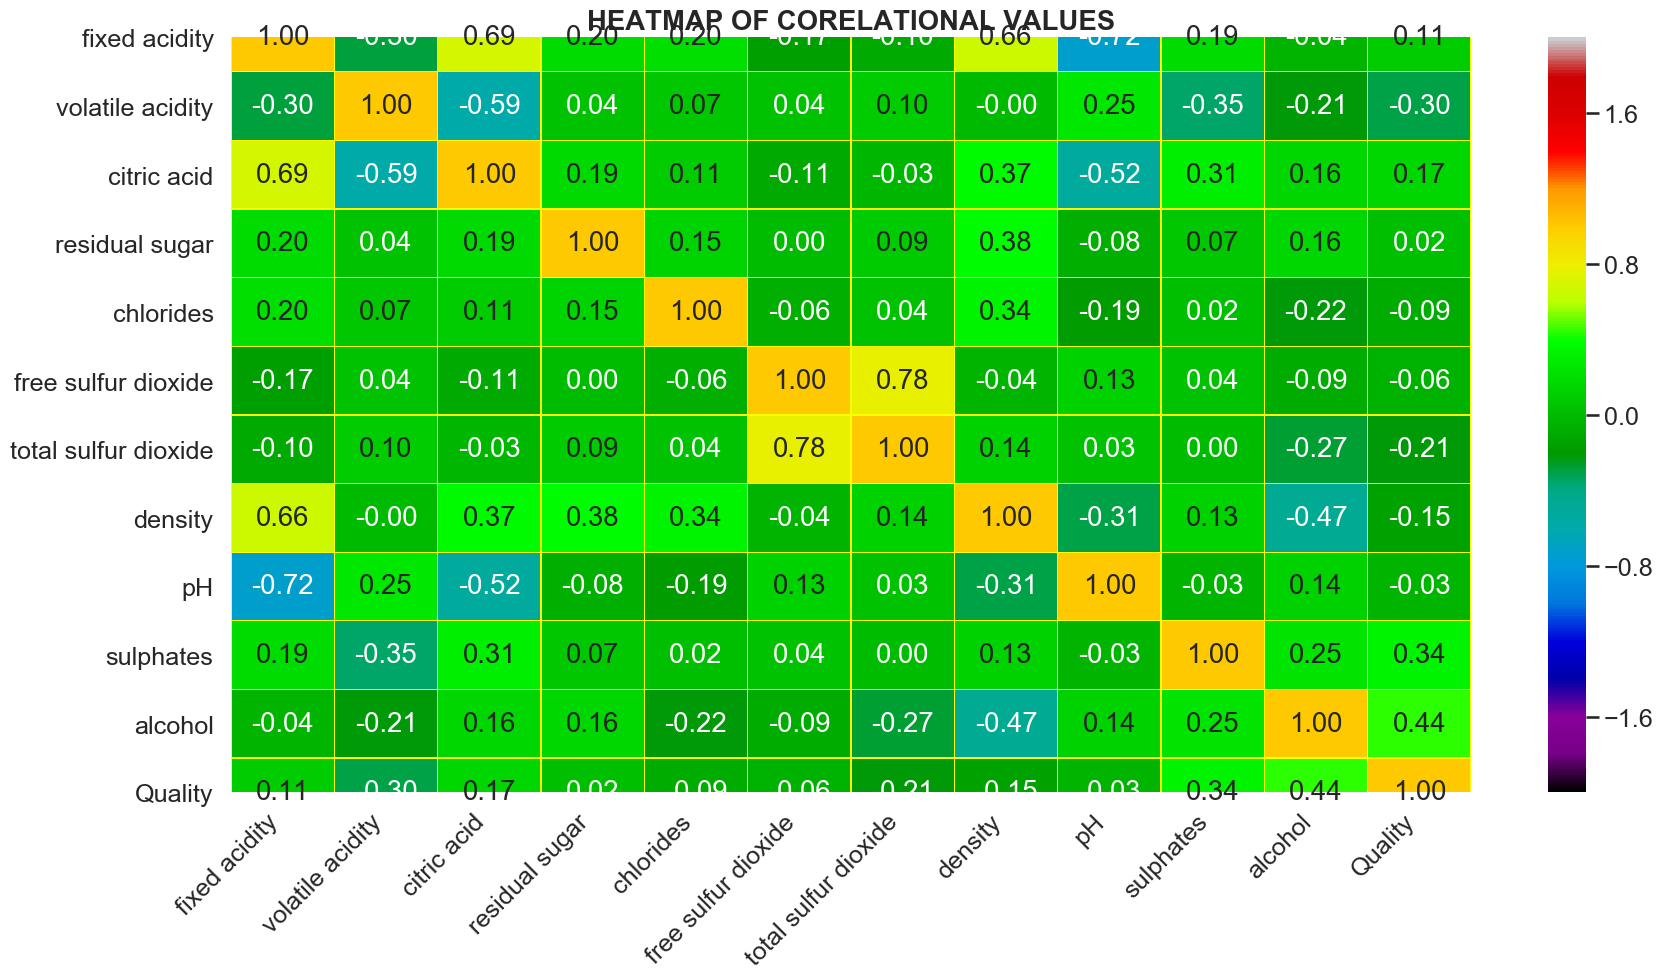

In [58]:
plt.figure(figsize=(20,10),dpi=100)
hmp=sns.heatmap(rw_corr,vmax=2,vmin=-2,annot=True,cbar=True,linewidth=0.2,fmt='.2f',cmap='nipy_spectral',linecolor='yellow')
hmp.set_xticklabels(hmp.get_xticklabels(),rotation=45,horizontalalignment='right')
plt.title('HEATMAP OF CORELATIONAL VALUES', weight='bold')

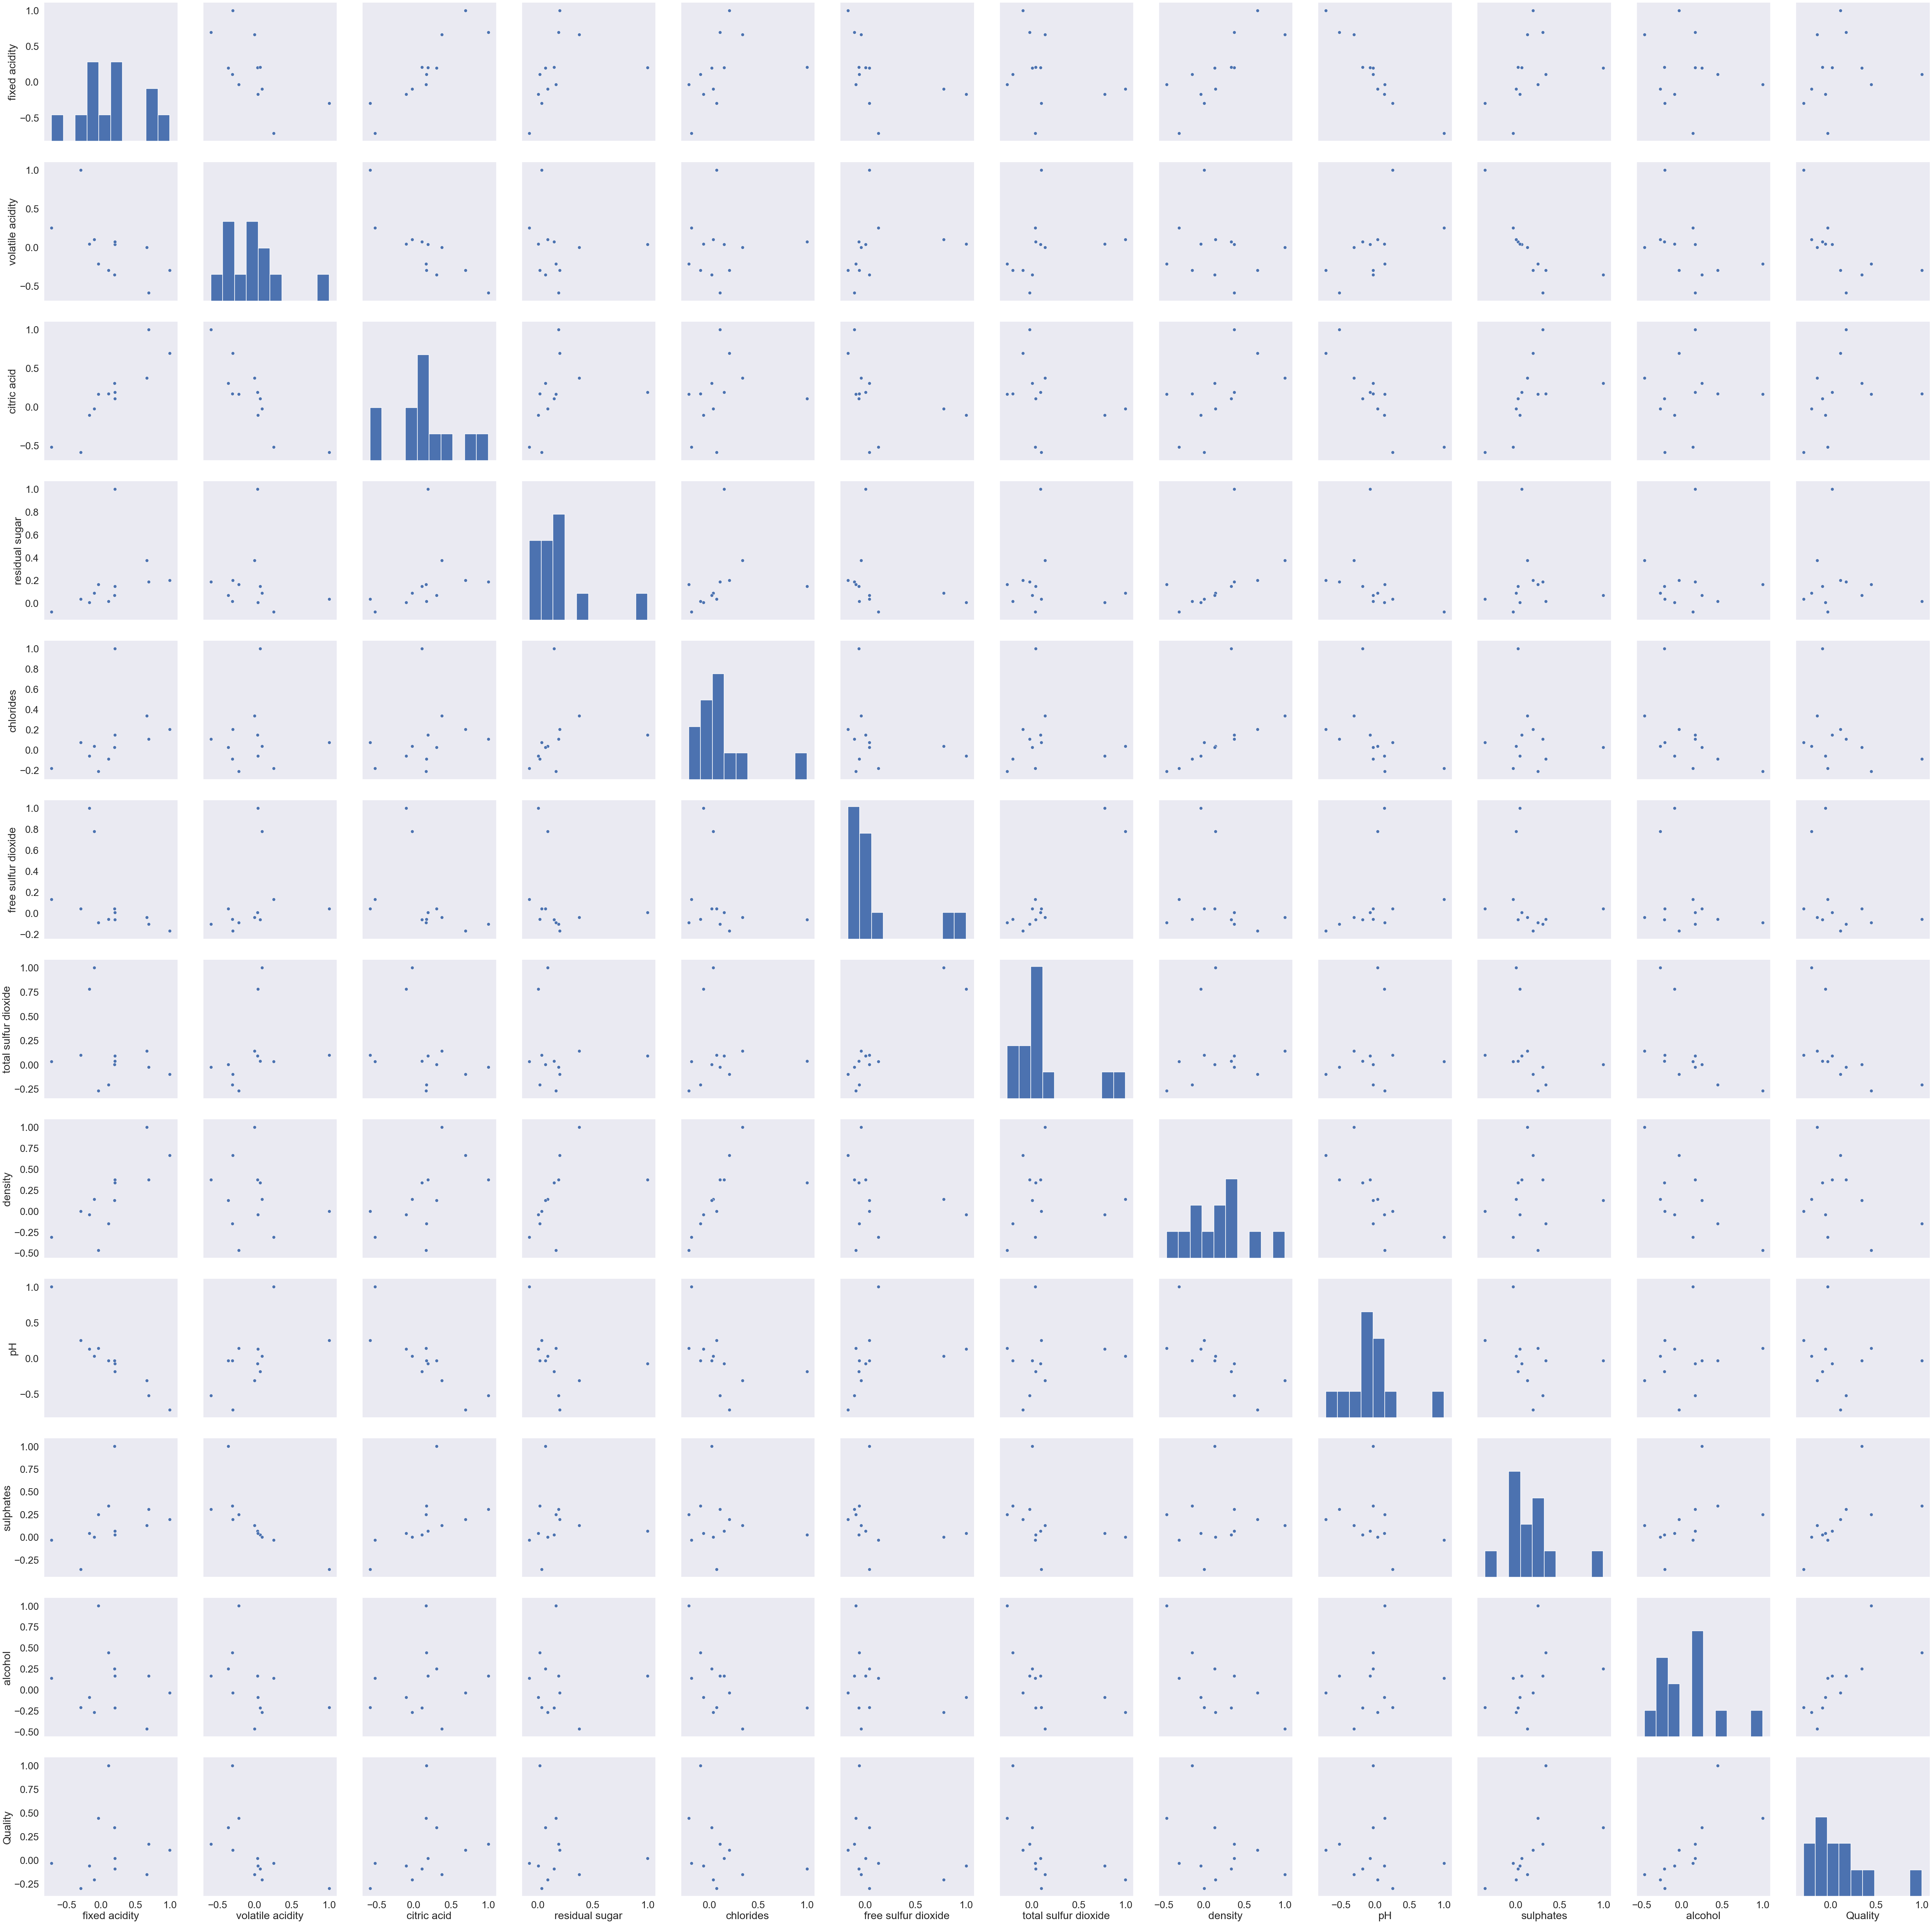

In [59]:
sns.set(style='dark')
sns.set_context('talk',font_scale=1.6)

sns.pairplot(rw_corr,palette='deep',diag_kind='hist',height=6)
plt.show()

In [60]:
#ml and model preparation

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,RandomForestClassifier
from sklearn.metrics import roc_curve,roc_auc_score,auc
import joblib
import warnings
warnings.filterwarnings('ignore')

In [62]:
redwine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Quality
0,2.128232,0.700,0.00,1.064711,0.073250,2.484907,3.555348,0.99780,3.51,0.444686,2.341806,0
1,2.174752,0.880,0.00,1.280934,0.093490,3.258097,4.219508,0.99680,3.20,0.518794,2.379546,0
2,2.174752,0.760,0.04,1.193922,0.088011,2.772589,4.007333,0.99700,3.26,0.500775,2.379546,0
3,2.501436,0.280,0.56,1.064711,0.072321,2.890372,4.110874,0.99800,3.16,0.457425,2.379546,1
4,2.128232,0.700,0.00,1.064711,0.073250,2.484907,3.555348,0.99780,3.51,0.444686,2.341806,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1.974081,0.600,0.08,1.098612,0.086178,3.496508,3.806662,0.99490,3.45,0.457425,2.442347,0
1595,1.931521,0.550,0.10,1.163151,0.060154,3.688879,3.951244,0.99512,3.52,0.565314,2.501436,1
1596,1.987874,0.510,0.13,1.193922,0.073250,3.401197,3.713572,0.99574,3.42,0.559616,2.484907,1
1597,1.931521,0.645,0.12,1.098612,0.072321,3.496508,3.806662,0.99547,3.57,0.536493,2.415914,0


In [63]:
x=redwine.iloc[:,0:11]
y=redwine.iloc[:,-1]


In [64]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,2.128232,0.700,0.00,1.064711,0.073250,2.484907,3.555348,0.99780,3.51,0.444686,2.341806
1,2.174752,0.880,0.00,1.280934,0.093490,3.258097,4.219508,0.99680,3.20,0.518794,2.379546
2,2.174752,0.760,0.04,1.193922,0.088011,2.772589,4.007333,0.99700,3.26,0.500775,2.379546
3,2.501436,0.280,0.56,1.064711,0.072321,2.890372,4.110874,0.99800,3.16,0.457425,2.379546
4,2.128232,0.700,0.00,1.064711,0.073250,2.484907,3.555348,0.99780,3.51,0.444686,2.341806
...,...,...,...,...,...,...,...,...,...,...,...
1594,1.974081,0.600,0.08,1.098612,0.086178,3.496508,3.806662,0.99490,3.45,0.457425,2.442347
1595,1.931521,0.550,0.10,1.163151,0.060154,3.688879,3.951244,0.99512,3.52,0.565314,2.501436
1596,1.987874,0.510,0.13,1.193922,0.073250,3.401197,3.713572,0.99574,3.42,0.559616,2.484907
1597,1.931521,0.645,0.12,1.098612,0.072321,3.496508,3.806662,0.99547,3.57,0.536493,2.415914


In [65]:
y

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: Quality, Length: 1458, dtype: int32

In [66]:
print(' shape of x: ', x.shape,'\n shape of y: ',y.shape)

 shape of x:  (1458, 11) 
 shape of y:  (1458,)


In [67]:
ss=StandardScaler()

In [68]:
x=ss.fit_transform(x)
x

array([[-0.51966386,  1.0387081 , -1.38741253, ...,  1.37476832,
        -0.63069472, -1.02736587],
       [-0.24601866,  2.10132549, -1.38741253, ..., -0.82375195,
         0.33347426, -0.59418188],
       [-0.24601866,  1.39291389, -1.17821377, ..., -0.3982319 ,
         0.09904761, -0.59418188],
       ...,
       [-1.34528946, -0.0829436 , -0.70751654, ...,  0.73648824,
         0.86458178,  0.61514753],
       [-1.67677496,  0.71401945, -0.75981623, ...,  1.80028837,
         0.56375156, -0.17675357],
       [-1.59213593, -1.26362959,  1.07067297, ...,  0.52372821,
         0.1776601 ,  0.61514753]])

In [69]:
y=np.array(y)
y.shape

(1458,)

In [70]:
y=y.reshape(-1,1)

In [71]:
print('the shape of x: ', x.shape, '\n shape of y: ', y.shape)

the shape of x:  (1458, 11) 
 shape of y:  (1458, 1)


In [72]:
#programme to find best random_state

In [73]:
def acusr(model,x,y):
    max_ac_score=0
    for rst in range(25,180):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=rst)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        ascr=accuracy_score(pred,y_test)
        f1=f1_score(pred,y_test)
        clr=classification_report(y_test,pred)
        conf=confusion_matrix(y_test,pred)
        if ascr>max_ac_score:
            max_ac_score=ascr
            final_rst=rst
    print("In this",model,'\nThe best suited random_score is: ', final_rst, '\nWith an accuracy score of: ', max_ac_score)
    print('f1_score:', f1)
    print('Confusion matrix:\n')
    print(conf)
    print('percentage of accuracy:-----', (max_ac_score*100).round(3))
    return final_rst

In [74]:
lreg=LogisticRegression()
lregm=acusr(lreg,x,y)

In this LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) 
The best suited random_score is:  59 
With an accuracy score of:  0.7788649706457925
f1_score: 0.7466666666666667
Confusion matrix:

[[182  59]
 [ 74 196]]
percentage of accuracy:----- 77.886


In [75]:
#cross_val_score to check for over/under fitting of logistic regressor model
logi_scr=cross_val_score(lreg,x,y,scoring='accuracy',cv=30)

In [76]:
print('The accuracy score produced by the Logistic Regressor Model is= ', logi_scr.mean(),'i.e.:',(logi_scr.mean()*100),'percent.' )

The accuracy score produced by the Logistic Regressor Model is=  0.7314756235827665 i.e.: 73.14756235827666 percent.


In [77]:
#using DecisionTreeClassifier algo with grid_search_cv to get best parameters for optimum performance
dtc=DecisionTreeClassifier()
dtc_para={'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth': range(4,10)}
dtc_gs=GridSearchCV(dtc,dtc_para,cv=30)
dtc_gs.fit(x,y)
print(dtc_gs)
print(dtc_gs.best_params_)

GridSearchCV(cv=30, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(4, 10),
                        

In [78]:
dtc=DecisionTreeClassifier(criterion='entropy',max_depth=4,splitter='random')
dtcm=acusr(dtc,x,y)

In this DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='random') 
The best suited random_score is:  150 
With an accuracy score of:  0.7553816046966731
f1_score: 0.7307692307692308
Confusion matrix:

[[181  60]
 [ 80 190]]
percentage of accuracy:----- 75.538


In [79]:
#fitting 
#cross_val_score=cvs

In [80]:
dtc_score= cross_val_score(dtc,x,y,cv=15,scoring='accuracy')

In [81]:
print('the mean accuracy score of dtc at cross_val is: \n', dtc_score.mean(),'i.e.',(dtc_score.mean()*100).round(2))

the mean accuracy score of dtc at cross_val is: 
 0.7004953012132689 i.e. 70.05


In [82]:
#svc
svc=SVC()
svpara={'kernel':['linear','poly','rbf'],'degree':(3,5)}
svgrd=GridSearchCV(svc,svpara,cv=10)
svgrd.fit(x,y)
svgrd.best_params_

{'degree': 3, 'kernel': 'rbf'}

In [83]:
svc=SVC(kernel='rbf',degree=3)
svcm=acusr(svc,x,y)

In this SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False) 
The best suited random_score is:  166 
With an accuracy score of:  0.8003913894324853
f1_score: 0.7877629063097515
Confusion matrix:

[[194  47]
 [ 64 206]]
percentage of accuracy:----- 80.039


In [84]:
svc_score=cross_val_score(svc,x,y,cv=15,scoring='accuracy')

In [85]:
print('the percentage of mean accuracy score at svc is: \n',(svc_score.mean()*100).round(2)) 

the percentage of mean accuracy score at svc is: 
 74.64


In [86]:
#knc
knc=KNeighborsClassifier()
knpara={'n_neighbors':range(10,40),'leaf_size':range(15,22)}
kngs=GridSearchCV(knc,knpara,cv=10)
kngs.fit(x,y)
kngs.best_params_

{'leaf_size': 15, 'n_neighbors': 36}

In [87]:
knc=KNeighborsClassifier(n_neighbors=36,leaf_size=15)
knc_mod=acusr(knc,x,y)

In this KNeighborsClassifier(algorithm='auto', leaf_size=15, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=36, p=2,
                     weights='uniform') 
The best suited random_score is:  166 
With an accuracy score of:  0.7808219178082192
f1_score: 0.7337057728119181
Confusion matrix:

[[171  70]
 [ 73 197]]
percentage of accuracy:----- 78.082


In [88]:
knc_score=cross_val_score(knc,x,y,cv=15,scoring='accuracy')
print('the percentage of mean accuracy score at knc using cross val score is: \n', (knc_score.mean()*100).round(3))

the percentage of mean accuracy score at knc using cross val score is: 
 71.278


In [89]:
#lets check some ensembel methods to get  batter results

In [90]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier

In [91]:
rfc=RandomForestClassifier()
rfc_para={"n_estimators":[200,400],'max_depth':[6,9]}
rfc_grid=GridSearchCV(rfc,rfc_para,cv=30)
rfc_grid.fit(x,y)
rfc_grid.best_params_

{'max_depth': 9, 'n_estimators': 200}

In [92]:
rfc=RandomForestClassifier(n_estimators=9,max_depth=400)
acusr(rfc,x,y)

In this RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=400, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=9,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) 
The best suited random_score is:  45 
With an accuracy score of:  0.8238747553816047
f1_score: 0.797752808988764
Confusion matrix:

[[190  51]
 [ 57 213]]
percentage of accuracy:----- 82.387


45

In [93]:
#checking for over/under fitting using cross_val_score
rfc_scr=cross_val_score(rfc,x,y,cv=30,scoring='accuracy')
print('the percentage of accuracy score at RFC model is=', (rfc_scr.mean()*100).round(3))

the percentage of accuracy score at RFC model is= 71.5


#GradientBoostingClassifier

In [95]:
#gbc=GradientBoostingClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=85)
para= {"learning_rate": [0.0001,0.025,0.01],"max_depth":range(5,9),"n_estimators":[250,750]}
gbc_grid= GridSearchCV(gbc,para,cv=30)
gbc_grid.fit(x_train,y_train)
print("best parameters:",gbc_grid.best_params_)
print("\n best score:",gbc_grid.best_score_)


best parameters: {'learning_rate': 0.025, 'max_depth': 7, 'n_estimators': 750}

 best score: 0.7879098360655737


In [96]:
gbc=GradientBoostingClassifier(learning_rate=0.025,max_depth=7,n_estimators=750)
gbcm=acusr(gbc,x,y)

In this GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.025, loss='deviance', max_depth=7,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=750,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) 
The best suited random_score is:  51 
With an accuracy score of:  0.8297455968688845
f1_score: 0.8082706766917294
Confusion matrix:

[[194  47]
 [ 55 215]]
percentage of accuracy:----- 82.975


In [98]:
gbc_score=cross_val_score(gbc,x,y,cv=10,scoring='accuracy')
print('the percentage of accuracy at gbc with cross_val is: ', (gbc_score.mean()*100).round(3))

the percentage of accuracy at gbc with cross_val is:  68.385


In [99]:
#WE GOT ALL THE RANDOM STATE & ACCURACY_SCORE OF ALL ALGORITHMS & NOW PUTTING THEM IN ONE DATAFRAME FOR PROPER VISUALIZATION

info=[['LOGISTICS REGRESSION',59,77.886],
      ['Decision Tree Classifier',150,77.495],
      ['SVC',166,80.039],
      ['KNeighborsClassifier',166,78.082],
      ['RFC',169,82.19],
      ['GBC',51,82.975]]
perf=pd.DataFrame(info,columns=['MODEL_NAME','RANDOM_ST','ACCURACY'])
perf


,MODEL_NAME,RANDOM_ST,ACCURACY
0,LOGISTICS REGRESSION,59,77.886
1,Decision Tree Classifier,150,77.495
2,SVC,166,80.039
3,KNeighborsClassifier,166,78.082
4,RFC,169,82.190
5,GBC,51,82.975


 To get a maximum performing model we are using AdaBoostRegressor with SVC as base estimator

In [105]:
x_trin,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=85)
svc=SVC(kernel='rbf')
para={'n_estimators':(60,70)}
abc=AdaBoostClassifier(base_estimator=svc,algorithm='SAMME')
abc_grid=GridSearchCV(abc,para,cv=30)
abc_grid.fit(x_train,y_train)
print("best parameters:", abc_grid.best_params_)
print("\n best score:",abc_grid.best_score_)


best parameters: {'n_estimators': 60}

 best score: 0.5297131147540983


In [110]:
svc=SVC(kernel='rbf',gamma=0.01)
abc=AdaBoostClassifier(base_estimator=svc,algorithm='SAMME',learning_rate=0.01,n_estimators=60)
acusr(abc,x,y)

In this AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=SVC(C=1.0, cache_size=200, class_weight=None,
                                      coef0=0.0, decision_function_shape='ovr',
                                      degree=3, gamma=0.01, kernel='rbf',
                                      max_iter=-1, probability=False,
                                      random_state=None, shrinking=True,
                                      tol=0.001, verbose=False),
                   learning_rate=0.01, n_estimators=60, random_state=None) 
The best suited random_score is:  41 
With an accuracy score of:  0.5909980430528375
f1_score: 0.6914212548015364
Confusion matrix:

[[  0 241]
 [  0 270]]
percentage of accuracy:----- 59.1


41

In [ ]:
#model finalization
#model gbc  is giving best score among other models

In [113]:
gbc=GradientBoostingClassifier(learning_rate=0.025,max_depth=7,n_estimators=750)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=103)
gbc.fit(x_train,y_train)
pred=gbc.predict(x_test)
ascr=accuracy_score(pred,y_test)
cnfm=confusion_matrix(y_test,pred)
clr=classification_report(y_test,pred)
print(pred,'\n')
print('the percentage of accuracy score is: ',(ascr*100).round(2))
print('\nconfusion matrx: \n', cnfm)
print('\nclassification rep: \n', clr)

[0 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 1 0 1 0 0 1
 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0
 1 1 0 1 0 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0
 1 1 1 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0
 1 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0
 1 0 1 1 1 1 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 0 1
 1 0 1 0 0 0 1 0 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1
 0 1 1 1 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0
 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 1 0 1 1 1 0 1 1 0 1 0 0 0 1 0 1 0 1 1 1
 0 1 1 0 1 0 1 1 1 0 0 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1
 1 1 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 0 1 1 1
 0 0 0 0 0 1 1 1 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 0
 1] 

the percentage of a

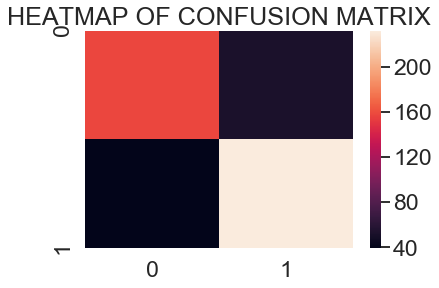

In [116]:
#using heatmap to visualize the confusion matrix for batter understanding
sns.set_context('talk',font_scale=1.4)
sns.heatmap(cnfm,annot=False)
plt.title('HEATMAP OF CONFUSION MATRIX')
plt.show()

#as it's a classification problem, we can implement the AUC - ROC Curve to check and visualize the performance.
PLOTTING AUC_ROC CURVE

In [117]:
tpr,fpr,threshold=roc_curve(y_test,pred)

In [118]:
tpr.mean()

0.4170616113744076

In [119]:
fpr.mean()

0.6186961869618696

In [120]:
threshold

array([2, 1, 0])

In [121]:
scores=roc_auc_score(y_test,pred)
scores

0.802451863381193

In [122]:
roc_auc=auc(tpr,fpr)
roc_auc

0.802451863381193

<Figure size 504x720 with 0 Axes>

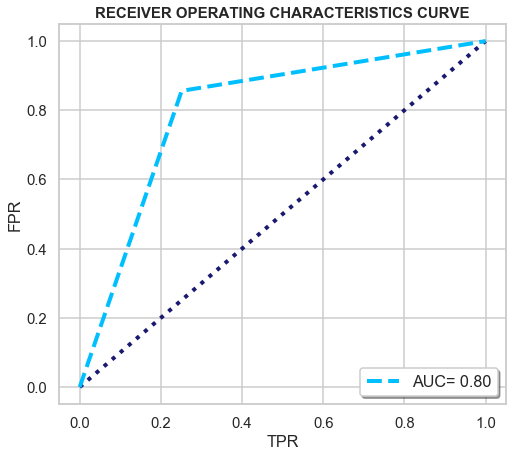

In [123]:
#plotting the auc_roc curve
plt.figure(figsize=(7,10))
sns.set(style='whitegrid')
sns.set_context('talk',font_scale=0.9)
plt.figure(figsize=(8,7))
plt.plot([0,1],[0,1],color='midnightblue',linestyle=":",lw=4)
plt.plot(tpr,fpr,label="AUC= %0.2f" % roc_auc,color='deepskyblue',lw=4,linestyle='--')
plt.legend(loc='lower right',fontsize='medium',shadow=True)
plt.xlabel("TPR")
plt.ylabel('FPR')
plt.title('RECEIVER OPERATING CHARACTERISTICS CURVE',size=15,weight='bold',loc='center')
plt.show()

saving the model

In [124]:
import joblib

In [125]:
joblib.dump(gbc,'red_wine_GBC.pkl')

['red_wine_GBC.pkl']